# Using yFinance to calculate PnL

This notebook will show a short example of how to use the yfinance python package to calculate the profit and loss of 5 stocks. The stocks chosen for this example will be: 
- Apple, denoted as "AAPL", 
- Google, denoted as "GOOGL", 
- Microsoft, denoted as "MSFT", 
- Amazon, denoted as "AMZN" and 
- Meta (Facebook), denoted as "META". 

This assumes you have downloaded the Python packages: matplotlib and yfinance. 

If you have not installed these packages, open your terminal and run the commands: 

`pip install yfinance`

`pip install matplotlib`

The first step is to import the libraries to our notebook: 

In [27]:
# by importing them with "as", we can assign a shorhand when we want to call these libraries
import yfinance as yf
import matplotlib.pyplot as plt

Next, let's create a list with the stock names that we are interested in looking at. In the yfinance package, the information about a stock is stored or downloaded in a "ticker". So we will call our list "tickers" and use it to download the stock price for all 5 stocks at the same time:

In [28]:
# Define the tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META']

# Get data for the tickers, "Adj Close", is the adjusted closing price of the stock. 
#    It takes into account the price after adjustments for all applicable splits and dividend distributions
data = yf.download(tickers, start='2022-01-01', end='2023-07-15')['Adj Close']

data

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2022-01-03,180.434296,170.404495,144.991501,338.540009,330.092285
2022-01-04,178.144302,167.522003,144.399506,336.529999,324.432129
2022-01-05,173.405685,164.356995,137.774994,324.170013,311.977875
2022-01-06,170.510956,163.253998,137.747498,332.459991,309.512634
2022-01-07,170.679504,162.554001,137.016998,331.790009,309.670410
...,...,...,...,...,...
2023-07-10,188.610001,127.129997,116.449997,294.100006,331.829987
2023-07-11,188.080002,128.779999,117.139999,298.290009,332.470001
2023-07-12,189.770004,130.800003,118.930000,309.339996,337.200012


We have used the "Adj Close" price, however, you could use any of the available prices that are stored, some examples are: 
- "High": Highest price recorded for the day
- "Low": Lowest price recorded for the day
- "Close": Price of the stock at the time the stock exchange closed
- "Open": Price of the stock at the time the stock exchange opened


## Plot of price over time

First, let's plot the share price over time to see the price fluctuations over the period we downloaded. The data we have downloaded starts on `2022-01-01`, or Jan 1st, 2022 and ends on `2023-07-15`, July 15th, 2023. So we have just over 1.5 years' worth of data. The rows represent each day that the stock exchange was open. Our columns are the 5 stocks we were interested in. (See the pandas dataframe above.)

<Figure size 1000x600 with 0 Axes>

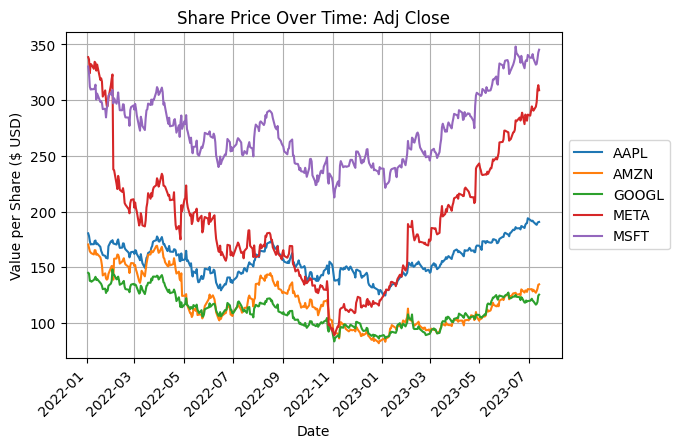

In [40]:
# create the figure and define it's size
plt.figure(figsize=(10, 6))

# Plot the data
data.plot(kind="line")

# Rotate the x-axis labels by 45 degrees, so they don't overlap
plt.xticks(rotation=45)

# add titles and information 
plt.title("Share Price Over Time: Adj Close")
plt.xlabel("Date")
plt.ylabel("Value per Share ($ USD)")

# move the legend outside the graph since there is no good place inside it 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Show the plot
plt.show()

This graph gives us an overview of what happened to each stock over the ~1.5 years' worth of data. From this, we can see that Amazon, Google and Meta are recording losses. 

## PnL: Profits and Losses per Single Stock Price

Now, let's use this data to calculate the profit or loss of each stock. This first one will be per 1 share of the stock. 

We will assume: 

- the purchase date of the stock is the first day in the database, `2022-01-03`: Jan 3rd, 2022.
- the stock sale is the last day in the database, `2023-07-14`: July 14th, 2023. 

In [7]:
# Compute the purchase price (assuming its the start date) and current price (assuming its the end date)
purchase_price = data.iloc[0] # grabs the 1st row
current_price = data.iloc[-1] # grabs the last row

# Compute the profit and loss (per share)
pnl = current_price - purchase_price

# for fun, let's sort the values higest to lowest profit
pnl = pnl.sort_values(ascending=False)

# lets look at our values 
print(pnl)
print("******")

# pnl_position will be used to colour code the graph of profit and loss 
pnl_positive = pnl >0 

print(pnl_positive)

MSFT     15.147705
AAPL     10.255692
GOOGL   -19.571503
META    -29.670013
AMZN    -35.724503
dtype: float64
******
MSFT      True
AAPL      True
GOOGL    False
META     False
AMZN     False
dtype: bool


We can see with certainty that Google, Meta and Amazon have recorded losses, and we now know the magnitude of that loss for each company share. Time to make a graph of these! 

## Graph of Basic Profit and Loss for Each Company

Let's visualize the profit and loss for each company on a bar graph, giving us a visual comparison of how well the companies have done in comparison to each other. 


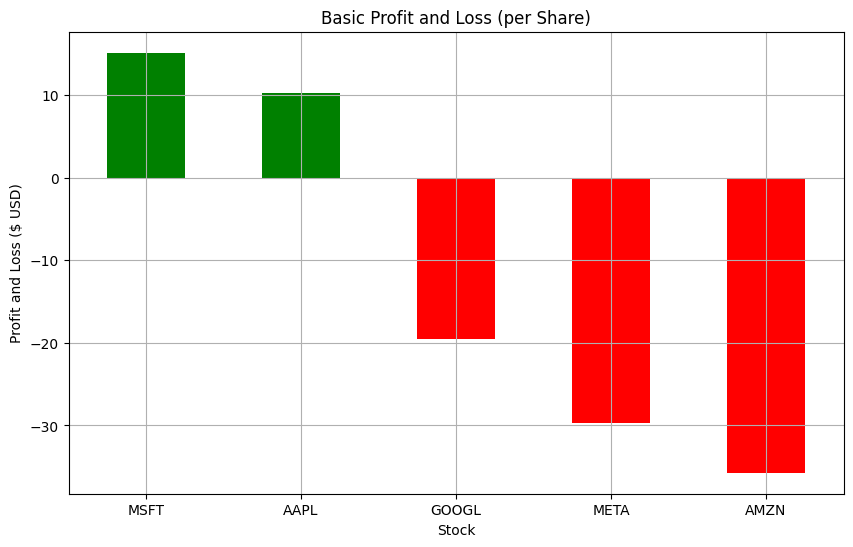

In [36]:
# Visualize the profit and loss
plt.figure(figsize=(10, 6))

# use the color parameter to map the colour of the bar to green or red based on gain or loss 
pnl.plot(kind='bar', color=pnl_positive.map({True: 'g', False: 'r'}))

# Rotate the x-axis labels by 0 degrees, so they are horizontal
plt.xticks(rotation=0)

# add titles and information 
plt.xlabel('Stock')
plt.ylabel('Profit and Loss ($ USD)')
plt.title('Basic Profit and Loss (per Share)')
plt.grid(True)

#show the graph
plt.show()

Now we can see just how much, in comparison, each stock has lost or gained. Now, this is still per share, so the last thing we may want to do is calculate a total loss and profit based on how many stocks you own in each company. 

## Your Personal PnL 

To do this, we will need to take the price per single stock and multiply that by the number of stocks you purchased on our initial purchase date (Jan 3rd, 2022) for each company. 

This can be interactive feel free to adjust the list `your_shares` to see the effect it has on the profit and loss of each and your total profit (or loss) over this time period. 


In [39]:
# enter the number of shares for each stock here 
# order of shares: MSFT, AAPL, GOOGL, META, AMZN
your_shares = [4,3,1,2,2]

your_pnl = pnl*your_shares

print(your_pnl)

your_sum = your_pnl.sum()

print("**Sum of your profits and losses:**", your_sum)

MSFT     60.590820
AAPL     30.767075
GOOGL   -19.571503
META    -59.340027
AMZN    -71.449005
dtype: float64
**Sum of your profits and losses:** -59.00263977050781


With the list `your_shares` at its default (`[4,3,1,2,2]`), you have a loss of $59 USD.

Like before, we can visualize our stocks' actual profit and loss.


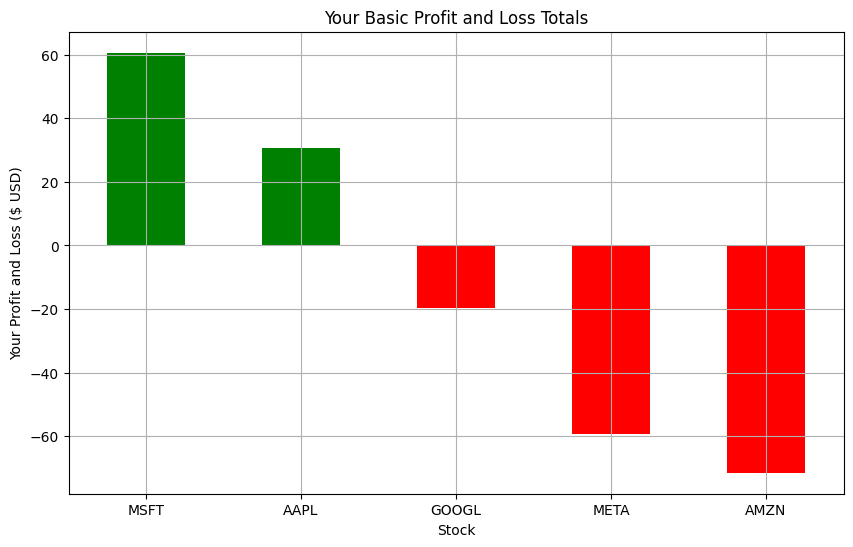

In [37]:
# Visualize your profit and loss
plt.figure(figsize=(10, 6))

# use the color parameter to map the colour of the bar to green or red based on gain or loss 
your_pnl.plot(kind='bar', color=pnl_positive.map({True: 'g', False: 'r'}))

# Rotate the x-axis labels by 0 degrees, so they are horizontal
plt.xticks(rotation=0)

# add titles and information 
plt.xlabel('Stock')
plt.ylabel('Your Profit and Loss ($ USD)')
plt.title('Your Basic Profit and Loss Totals')
plt.grid(True)

plt.show()